In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r"C:\Users\user\Downloads\Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df = data.drop(['country'],axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [8]:
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=sc.fit_transform(df)

# K-Means Clustering

In [10]:
from sklearn.cluster import KMeans

#print within cluster sum of squares
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1503.0000000000002
1050.2145582853307
831.424435208687
700.3229986404373
620.163371288842
571.9992966496745
495.3233825951917
455.27682760469946


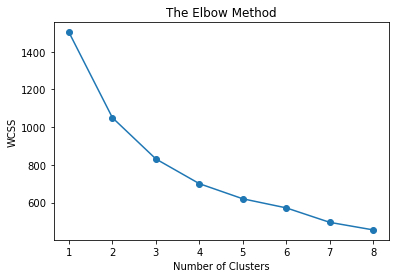

In [11]:
#elbow method
plt.plot(range(1,9),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the graph  the optimum number of clusters is 3

In [12]:
#k-means with number  of clusters=3
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df1)
type(df1)
y_kmeans

#convert it into dataframe
y_kmeans=pd.DataFrame(y_kmeans)
y_kmeans = y_kmeans.rename(columns={0:'label'})
#create a new data frame with y_kmeans
df2 = pd.concat([data,y_kmeans], axis=1)
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


# Visualization

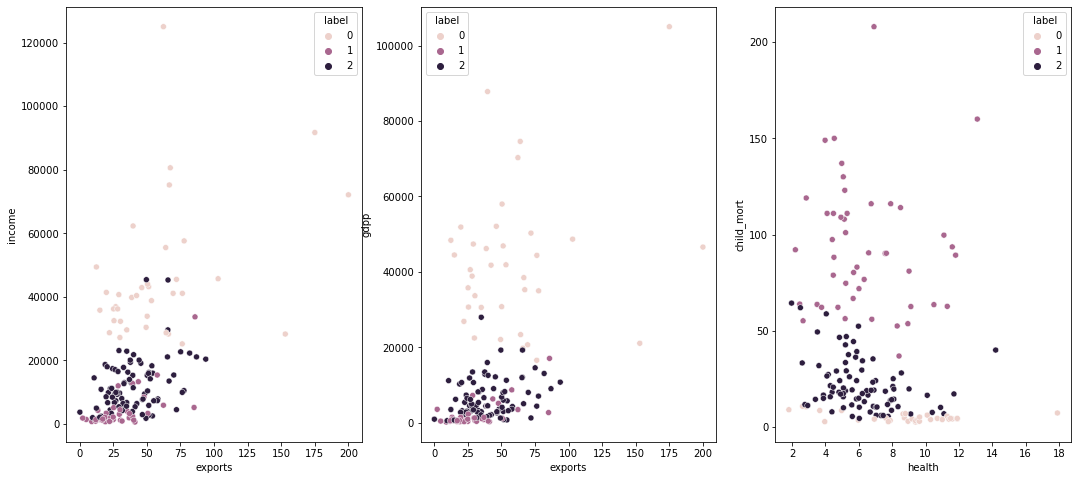

In [13]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=df2, x='exports', y='income', hue='label', ax=ax[0])
sns.scatterplot(data=df2, x='exports', y='gdpp', hue='label', ax=ax[1])
sns.scatterplot(data=df2, x='health', y='child_mort', hue='label', ax=ax[2])
plt.show()

In [14]:
df3=df2.groupby(['label','country']).mean()
pd.set_option('display.max_rows',None)
df3

child_mort  exports  health   imports  \
label country                                                                 
0     Australia                              4.8   19.800    8.73   20.9000   
      Austria                                4.3   51.300   11.00   47.8000   
      Bahrain                                8.6   69.500    4.97   50.9000   
      Belgium                                4.5   76.400   10.70   74.7000   
      Brunei                                10.5   67.400    2.84   28.0000   
      Canada                                 5.6   29.100   11.30   31.0000   
      Cyprus                                 3.6   50.200    5.97   57.5000   
      Czech Republic                         3.4   66.000    7.88   62.9000   
      Denmark                                4.1   50.500   11.40   43.6000   
      Finland                                3.0   38.700    8.95   37.4000   
      France                                 4.2   26.800   11.90   28.1000   
      Germany                                4.2   42.300   11.60   37.1000   
      Greece                                 3.9   22.100   10.30   30.7000   
      Iceland                                2.6   53.400    9.40   43.3000   
      Ireland                                4.2  103.000    9.19   86.5000   
      Israel                                 4.6   35.000    7.63   32.9000   
      Italy                                  4.0   25.200    9.53   27.2000   
      Japan                                  3.2   15.000    9.49   13.6000   
      Kuwait                                10.8   66.700    2.63   30.4000   
      Luxembourg                             2.8  175.000    7.77  142.0000   
      Malta                                  6.8  153.000    8.65  154.0000   
      Netherlands                            4.5   72.000   11.90   63.6000   
      New Zealand                            6.2   30.300   10.10   28.0000   
      Norway                                 3.2   39.700    9.48   28.5000   
      Portugal                               3.9   29.900   11.00   37.4000   
      Qatar                                  9.0   62.300    1.81   23.8000   
      Singapore                              2.8  200.000    3.96  174.0000   
      Slovak Republic                        7.0   76.300    8.79   77.8000   
      Slovenia                               3.2   64.300    9.41   62.9000   
      South Korea                            4.1   49.400    6.93   46.2000   
      Spain                                  3.8   25.500    9.54   26.8000   
      Sweden                                 3.0   46.200    9.63   40.7000   
      Switzerland                            4.5   64.000   11.50   53.3000   
      United Arab Emirates                   8.6   77.700    3.66   63.6000   
      United Kingdom                         5.2   28.200    9.64   30.8000   
      United States                          7.3   12.400   17.90   15.8000   
1     Afghanistan                           90.2   10.000    7.58   44.9000   
      Angola                               119.0   62.300    2.85   42.9000   
      Benin                                111.0   23.800    4.10   37.2000   
      Botswana                              52.5   43.600    8.30   51.3000   
      Burkina Faso                         116.0   19.200    6.74   29.6000   
      Burundi                               93.6    8.920   11.60   39.2000   
      Cameroon                             108.0   22.200    5.13   27.0000   
      Central African Republic             149.0   11.800    3.98   26.5000   
      Chad                                 150.0   36.800    4.53   43.5000   
      Comoros                               88.2   16.500    4.51   51.7000   
      Congo, Dem. Rep.                     116.0   41.100    7.91   49.6000   
      Congo, Rep.                           63.9   85.100    2.46   54.7000   
      Cote d'Ivoire                        111.0   50.600    5.30   43.3000   
      Equ

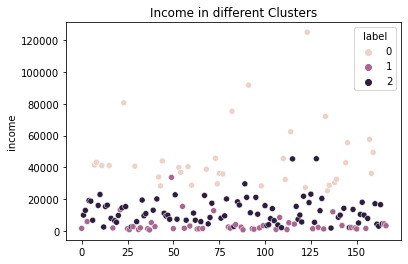

In [15]:
sns.scatterplot(x=df2.index, y=df2['income'],hue=df2['label'])
plt.title('Income in different Clusters')
plt.show()

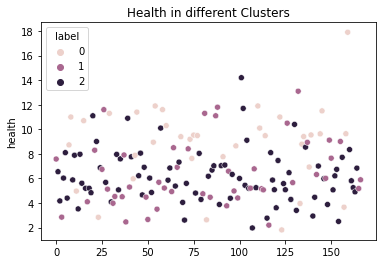

In [16]:
sns.scatterplot(x=df2.index, y=df2['health'],hue=df2['label'])
plt.title('Health in different Clusters')
plt.show()

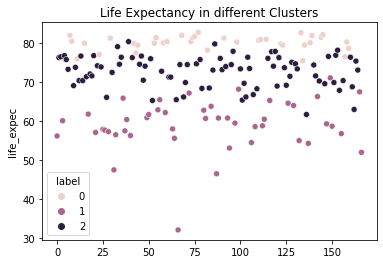

In [17]:
sns.scatterplot(x=df2.index, y=df2['life_expec'],hue=df2['label'])
plt.title('Life Expectancy in different Clusters')
plt.show()

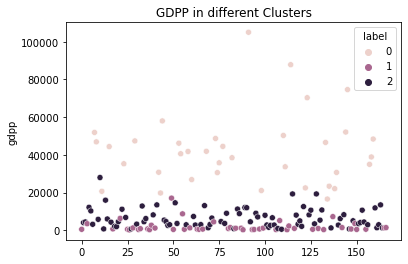

In [18]:
sns.scatterplot(x=df2.index, y=df2['gdpp'],hue=df2['label'])
plt.title('GDPP in different Clusters')
plt.show()

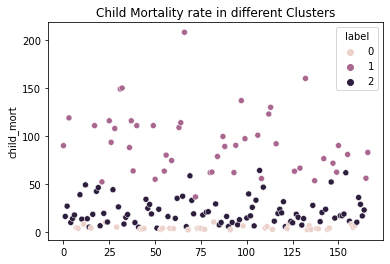

In [19]:
sns.scatterplot(x=df2.index, y=df2['child_mort'],hue=df2['label'])
plt.title('Child Mortality rate in different Clusters')
plt.show()

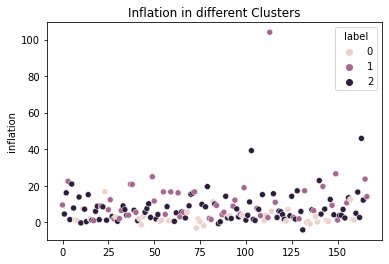

In [20]:
sns.scatterplot(x=df2.index, y=df2['inflation'],hue=df2['label'])
plt.title('Inflation in different Clusters')
plt.show()

In [21]:
df4=df2[df2['label']==1]
df4[['country']]

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


The above mentioned are the countries that are in the direst need of aid based on socio-economic and health factors.